
## ✈️ Task 2: Predictive Modeling of Customer Bookings

This notebook walks through the end-to-end development of a predictive model aimed at understanding customer booking behavior for British Airways. We'll utilize Python libraries such as **Pandas**, **NumPy**, **Matplotlib**, **Seaborn**, and **Scikit-learn** to perform data preprocessing, feature engineering, model training, and interpretation.

---

### 🔍 Exploratory Data Analysis (EDA)

We begin with a thorough exploration of the dataset to understand its structure and statistical properties. Key EDA steps include:

- Inspecting data samples using `.head()`
- Reviewing schema and null counts via `.info()`
- Understanding feature semantics and their distributions

### 📊 Feature Overview

Each feature in the dataset represents customer or flight-related metadata. Below is a brief description:

- `num_passengers`: Number of passengers in the booking  
- `sales_channel`: Platform used for the booking (e.g., web, mobile)  
- `trip_type`: Type of trip (One Way, Round Trip, etc.)  
- `purchase_lead`: Days between booking and travel  
- `length_of_stay`: Duration of stay at the destination  
- `flight_hour`: Hour of flight departure  
- `flight_day`: Day of the week the flight departs  
- `route`: Origin to destination flight path  
- `booking_origin`: Country where the booking was made  
- `wants_extra_baggage`: Indicates if extra baggage was selected  
- `wants_preferred_seat`: Indicates if a preferred seat was selected  
- `wants_in_flight_meals`: Indicates if in-flight meals were selected  
- `flight_duration`: Total duration of the flight (in hours)  
- `booking_complete`: Target variable (1 = booking completed, 0 = not completed)

Before performing any computations or model training, we’ll clean and convert relevant features to appropriate data types.


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("/Users/nick/Desktop/BRITISH AIRWAYS/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [8]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [9]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [10]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [11]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [12]:
print(df.columns)
df.rename(columns=lambda x: x.strip(), inplace=True)  # remove trailing spaces

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')


In [13]:
# Show all columns
print(df.columns.tolist())

# Search for columns containing "book" (case insensitive)
print([col for col in df.columns if "book" in col.lower()])

['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'route', 'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete']
['booking_origin', 'booking_complete']


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [15]:
df.columns = df.columns.str.strip()  # Remove any spaces
print(df.columns.tolist())

['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'route', 'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete']


In [16]:
df.rename(columns=lambda x: x.strip(), inplace=True)  # remove trailing spaces

In [17]:
# Check for missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


In [18]:
# Check for duplicates
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
719


In [19]:
# Distribution of target variable (assuming 'booking_made' or similar)
if 'booking_made' in df.columns:
    print("\nDistribution of target variable 'booking_made':")
    print(df['booking_made'].value_counts(normalize=True))

In [20]:
# Distribution of categorical columns (for example, 'destination', 'travel_class')
for col in ['destination', 'travel_class', 'booking_channel']:
    if col in df.columns:
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts())

In [21]:

# Explore correlation matrix (only numeric columns)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("\nCorrelation matrix:")
print(df[numeric_cols].corr())


Correlation matrix:
                       num_passengers  purchase_lead  length_of_stay  \
num_passengers               1.000000       0.212606       -0.115850   
purchase_lead                0.212606       1.000000       -0.076560   
length_of_stay              -0.115850      -0.076560        1.000000   
flight_hour                  0.015607       0.035973       -0.024872   
flight_day                   0.015407       0.036531       -0.000310   
wants_extra_baggage          0.120404      -0.022207        0.176757   
wants_preferred_seat         0.028544      -0.004499        0.032264   
wants_in_flight_meals        0.022943      -0.022653        0.098828   
flight_duration             -0.063169       0.067866        0.141181   
booking_complete             0.024116      -0.022131       -0.042408   

                       flight_hour  flight_day  wants_extra_baggage  \
num_passengers            0.015607    0.015407             0.120404   
purchase_lead             0.035973    0.0365

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8504
           1       0.51      0.13      0.20      1496

    accuracy                           0.85     10000
   macro avg       0.68      0.55      0.56     10000
weighted avg       0.81      0.85      0.81     10000

ROC-AUC Score: 0.788


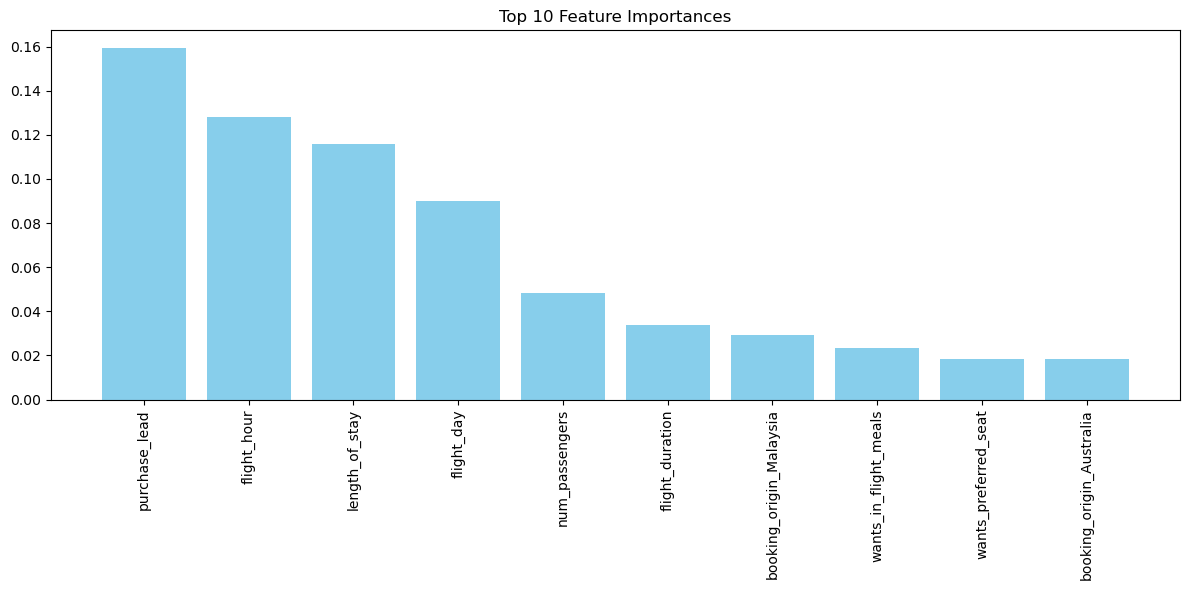

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# ---- Step 1: Prepare Target and Features ----
target = 'booking_complete'
X = df.drop(columns=[target])
y = df[target]

# ---- Step 2: One-hot encode any remaining categorical columns ----
# Identify columns with dtype 'object' (strings or categoricals)
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
if cat_cols:
    X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# ---- Step 3: Standardize Only Numeric Features ----
# Select only numeric feature columns for scaling
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# ---- Step 4: Split into Train/Test Sets ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---- Step 5: Train Random Forest ----
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# ---- Step 6: Predictions/Evaluation ----
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba):.3f}")

# ---- Step 7: Feature Importance Visualization ----
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 6))
plt.title("Top 10 Feature Importances")
plt.bar(range(10), importances[indices][:10], color='skyblue')
plt.xticks(range(10), features[indices][:10], rotation=90)
plt.tight_layout()
plt.show()

Model Training with Random Forest

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Define target and features
target = 'booking_complete'
X = df.drop(columns=[target])
y = df[target]

# Step 1: One-hot encode categorical columns (object dtype)
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
if cat_cols:
    X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 3: Initialize and train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Model Evaluation

In [26]:
from sklearn.metrics import classification_report, roc_auc_score

# Predict and obtain probabilities on test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Print metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba):.3f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      8504
           1       0.51      0.13      0.20      1496

    accuracy                           0.85     10000
   macro avg       0.69      0.55      0.56     10000
weighted avg       0.81      0.85      0.81     10000

ROC-AUC Score: 0.788


Feature Importance Plotting

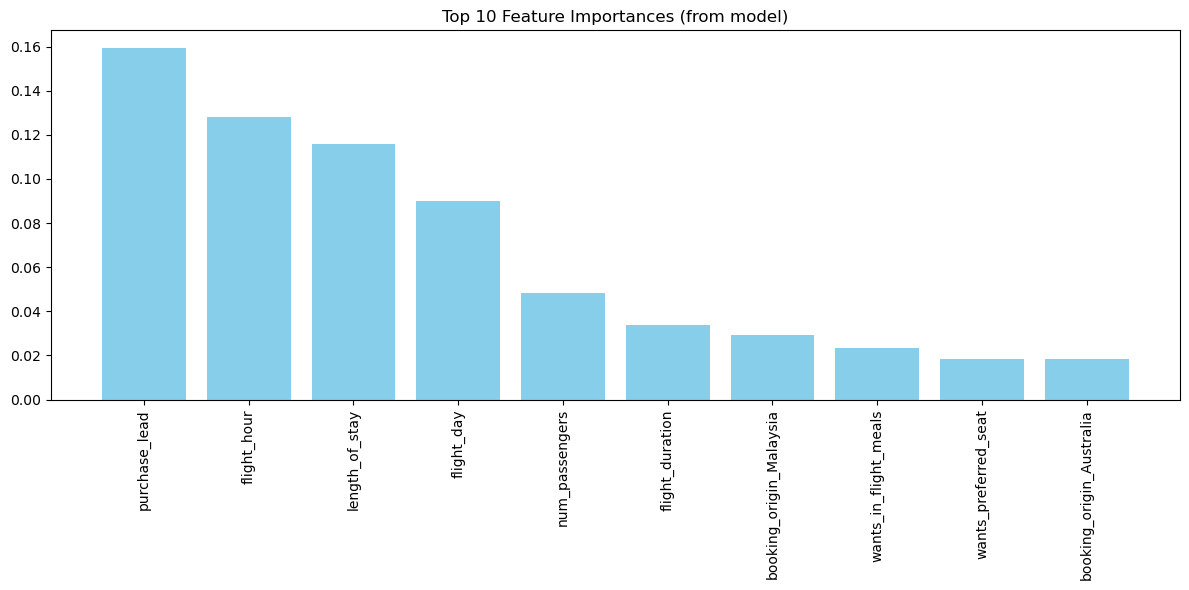

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# If you used GridSearchCV and the variable name is 'grid'
# Otherwise, use 'model' if you fit RandomForestClassifier directly
try:
    # This will work if you used GridSearchCV and it succeeded
    importances = grid.best_estimator_.feature_importances_
    model_name = 'grid.best_estimator_'
except NameError:
    # Otherwise, fall back to a directly-trained model
    importances = model.feature_importances_
    model_name = 'model'

indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12,6))
plt.title("Top 10 Feature Importances (from {})".format(model_name))
plt.bar(range(10), importances[indices][:10], color='skyblue')
plt.xticks(range(10), features[indices][:10], rotation=90)
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

In [29]:
# CROSS-VALIDATION for model robustness
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Reuse the full feature matrix (X) and target (y) you already created
rf = RandomForestClassifier(random_state=42)
# 5-fold cross-validated ROC-AUC scores
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='roc_auc', n_jobs=-1)
print("Cross-validated ROC-AUC scores:", cv_scores)
print("Mean ROC-AUC:", cv_scores.mean())
# This gives a more robust estimate than a single hold-out split


Cross-validated ROC-AUC scores: [0.6850927  0.40596352 0.25320386 0.31082357 0.72328777]
Mean ROC-AUC: 0.47567428497021236


In [30]:
# HYPERPARAMETER TUNING with GridSearchCV for your Random Forest
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],       # Number of trees
    'max_depth': [None, 10, 20],      # Tree depth
    'min_samples_split': [2, 5]       # Minimum samples to split a node
}
grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1
)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best ROC-AUC from Grid Search:", grid.best_score_)

# Use the best model found for further evaluation
best_model = grid.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best ROC-AUC from Grid Search: 0.7844451525860755


In [31]:
# MODEL EVALUATION on the test set using the best model
from sklearn.metrics import classification_report, roc_auc_score

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]
print("Classification Report (Best Model):")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score (Best Model): {roc_auc_score(y_test, y_proba):.3f}")
# Save/print these results for your report or PowerPoint deck


Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8504
           1       0.55      0.10      0.17      1496

    accuracy                           0.85     10000
   macro avg       0.71      0.54      0.55     10000
weighted avg       0.82      0.85      0.81     10000

ROC-AUC Score (Best Model): 0.797


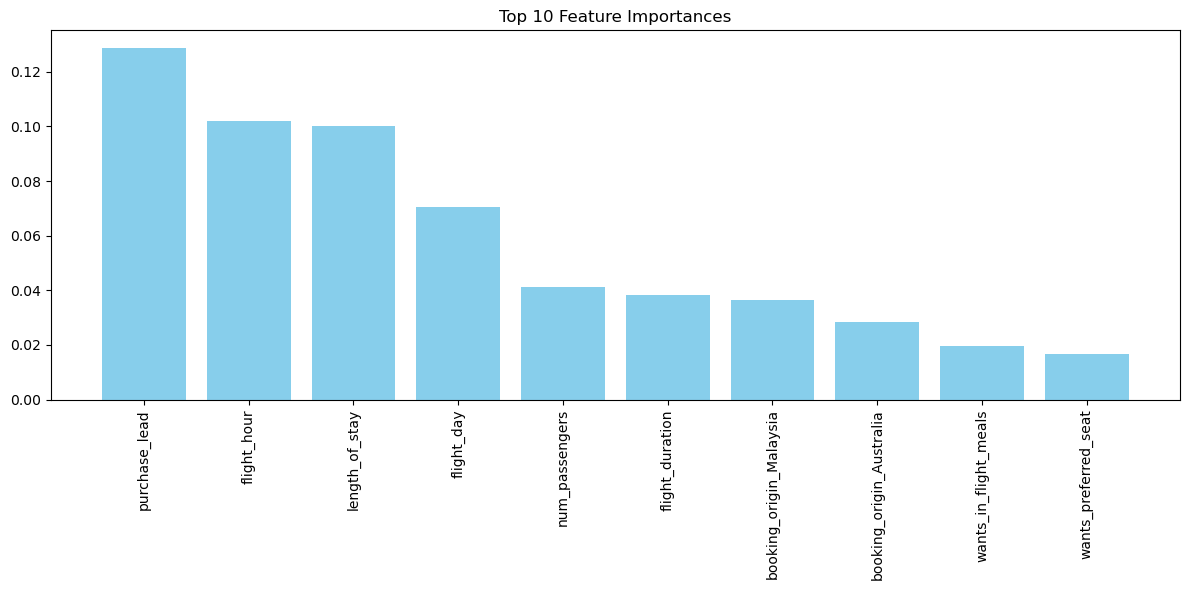

In [32]:
# FEATURE IMPORTANCE: Plot and save a figure for reporting
import matplotlib.pyplot as plt
import numpy as np

importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12,6))
plt.title("Top 10 Feature Importances")
plt.bar(range(10), importances[indices][:10], color='skyblue')
plt.xticks(range(10), features[indices][:10], rotation=90)
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()
# Use 'feature_importance.png' in your PowerPoint or reporting slide